# Fit the basis elements to Martin Hairer regularity structures

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import integrate

In [ ]:
data = np.load('../data_latent.npy')
print(data.shape)

nu_slice = 0

H = data[:,:,nu_slice,3::]
xx =  data[:,:,nu_slice,0]
tt =  data[:,:,nu_slice,1]
nunu =  data[:,:,nu_slice,2]

print(nunu)

noise = np.loadtxt('noise.txt')

(101, 101, 5, 35)
[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


In [ ]:
%matplotlib widget
from ipywidgets import interact, IntSlider

# Function to update the plot based on the slider value
def update_plot(dim):
    fig = plt.figure()
    global ax  # Declare ax as global to avoid redefinition in subsequent calls
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot_surface(tt, xx, H[:, :, dim], cmap='rainbow')
    ax1.set_xlabel('tt')
    ax1.set_ylabel('xx')
    ax1.set_zlabel('H')
    plt.show()

# Create a slider for the third dimension
slider = IntSlider(value=0, min=0, max=H.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)

In [ ]:
def heat_kernel(x,y,t):
    return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
def init_sines(x):
    return np.sin(x * np.pi / 5) + 0.2 * np.cos(x * np.pi / 5 * 1 / 2) + 2 * np.sin(x * np.pi / 5 * 2)
def init_sines(x):
    return 0.0

: 

: 

In [ ]:
basis_elements = np.ones([101,101,9])

# 0: index for space
# 1: index for time

for i in range(tt.shape[0]):
    for j in range(tt.shape[1]):
        y = xx[i,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*init_sines(y), y)  # This is c

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,1] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y)  # This is I[c]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dx c]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*basis_elements[i,::,0], y)  # This is I[c xi]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::]*np.gradient(basis_elements[i,::,0], y), y)  # This is I[Dxc xi]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0]**2, y)  # This is I[c^2]
            basis_elements[i,j,7] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)**2, y)  # This is I[Dxc ^2]
            basis_elements[i,j,8] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y)*basis_elements[i,::,0], y)  # This is I[c Dxc]


/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


: 

: 

In [ ]:
basis_elements = np.ones([101,101,7])

for i in range(len(xx)):
    for j in range(len(tt)):
        y = xx[j,::]
        if j >= 0:
            basis_elements[i,j,0] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*noise[i,::], y)  # This is I[noise]
            basis_elements[i,j,1] =  integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,0], y), y) # I[Dx I[noise]]
            basis_elements[i,j,2] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,0], y) # I[I[noise]]
            basis_elements[i,j,3] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,1]), y) # I[Dx I[Dx I[noise]]]
            basis_elements[i,j,4] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,1], y) # I[I[Dx I[noise]]]
            basis_elements[i,j,5] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*np.gradient(basis_elements[i,::,2]), y) # I[Dx I[I[noise]]]
            basis_elements[i,j,6] = integrate.trapezoid(heat_kernel(xx[i,j],y,tt[i,j])*basis_elements[i,::,2], y) # I[I[I[noise]]]

/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: invalid value encountered in divide
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))
/tmp/ipykernel_1470072/545054164.py:2: RuntimeWarning: invalid value encountered in multiply
  return 1/np.sqrt(4*np.pi*t*nunu[0,0]) * np.exp(-((x - y)**2/(4*nunu[0,0]*t)))


: 

: 

In [ ]:
%matplotlib widget
import ipywidgets as widgets
from ipywidgets import interact

# Function to update the plot based on the slider value

def update_plot(dim):
    fig = plt.figure()
    ax2 = fig.add_subplot(111,projection = '3d')
    #ax.clear()
    print(basis_elements[:, 1::, dim])
    ax2.plot_surface(xx[::,1::], tt[::,1::], basis_elements[:, 1::, dim], cmap='rainbow')
    ax2.set_xlabel('x')
    ax2.set_ylabel('t')
    ax2.set_zlabel('Basis Element')
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/reg_structure_'+str(dim)+'.pdf')
    plt.draw()
    plt.show()

# Create a slider for the third dimension
slider = widgets.IntSlider(value=4, min=0, max=basis_elements.shape[2]-1, step=1, description='Dimension:')
interact(update_plot, dim=slider)


interactive(children=(IntSlider(value=4, description='Dimension:', max=6), Output()), _dom_classes=('widget-in…

<function __main__.update_plot(dim)>

: 

: 

In [ ]:
print(np.reshape(basis_elements,(-1,9)).shape)

ValueError: cannot reshape array of size 71407 into shape (9)

: 

: 

[-0.23211703 -0.01752593  0.73537948  0.16962245  0.01519046  0.37878948
 -0.70810382]
[0.0027929]
0.5384727879298047


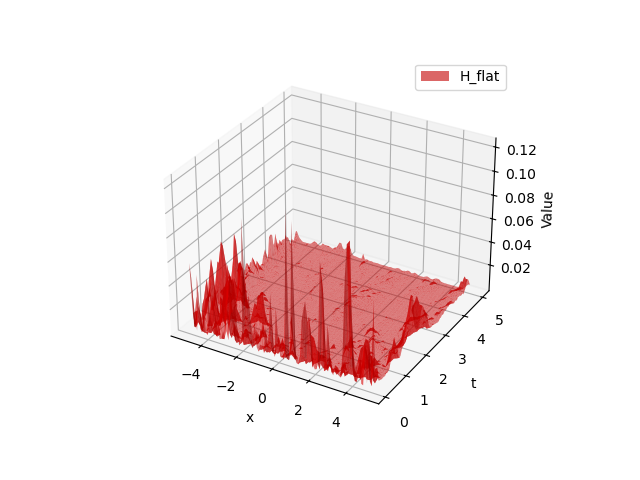

[-0.10127758 -0.39170339 -0.04521117  0.49510606  0.51222758  1.89484529
 -0.60627255]
[0.00536523]
0.5785933222474168


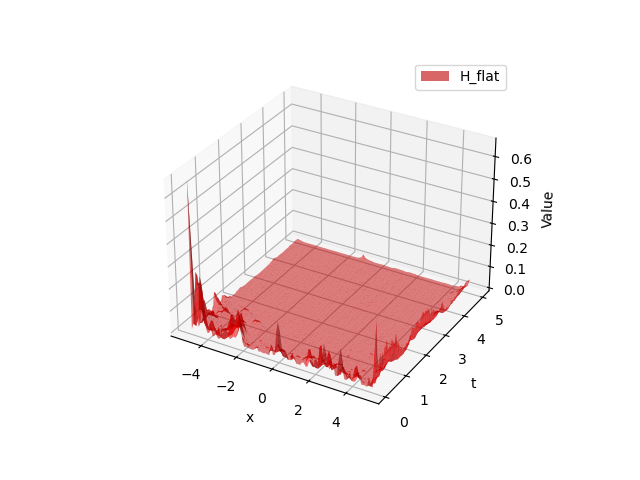

[ 0.14610571  0.31758824  0.058753   -0.19679872 -0.26001149 -1.73396923
  0.11358824]
[0.00629018]
5.120687650198335


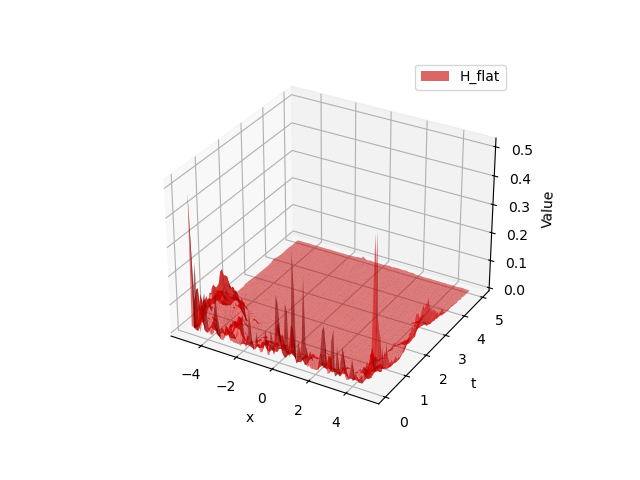

[-0.0576594   0.27160943  0.01022785 -0.25816385 -0.3836315  -1.05971197
  0.79275389]
[0.00610272]
0.2032653346568155


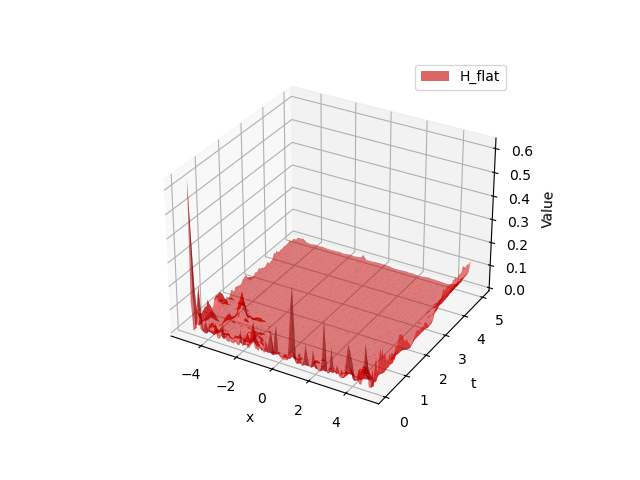

[ 0.0356155   0.38762401 -0.16166537 -0.18314179 -0.35350927 -1.9066153
  1.00377946]
[0.01011564]
0.12117148140397806


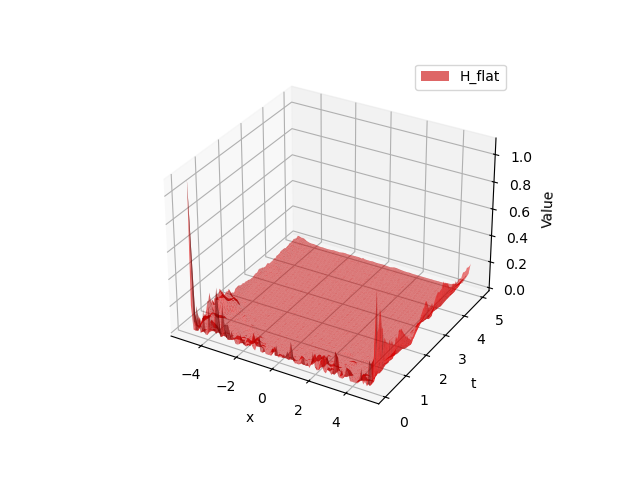

[-0.15117703  0.18642432  0.37639503 -0.19555609 -0.34228275  0.79253983
 -0.03361206]
[0.00646321]
7.358088707568301


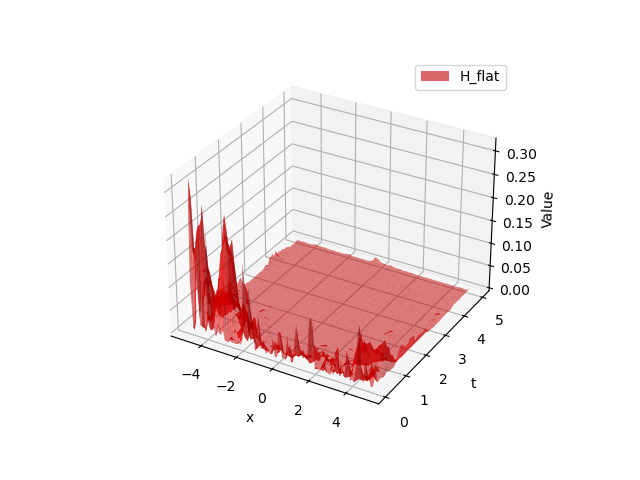

[ 0.13616889  0.2654412  -0.23706797 -0.36537297 -0.25207264 -1.68154357
  0.61831323]
[0.00695522]
0.3318397348505964


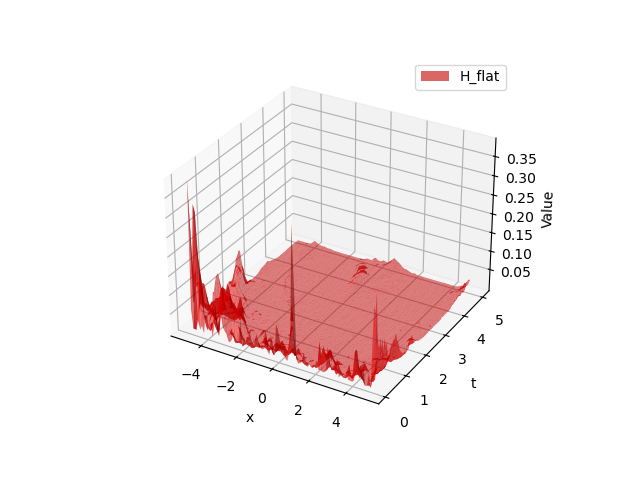

[-0.21096631  0.2453948   0.54320597 -0.04154121 -0.12638075 -1.54488895
  0.15116435]
[0.01218716]
0.2377604674337663


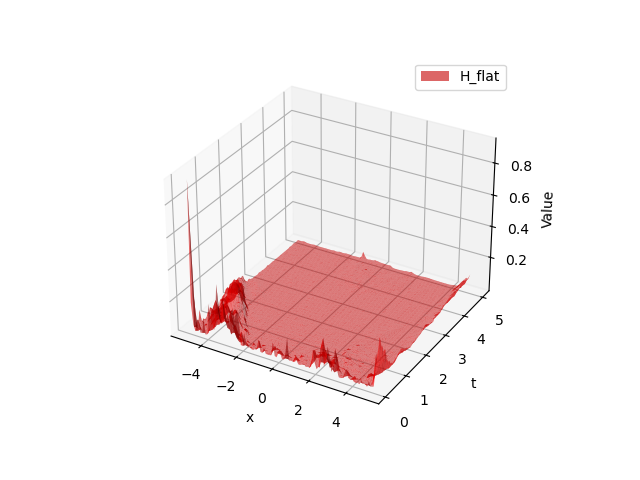

[ 0.04595543 -0.61134202 -0.74970974  0.54638414  0.81574132  1.71196633
 -0.18390654]
[0.01866418]
1.7425439254924107


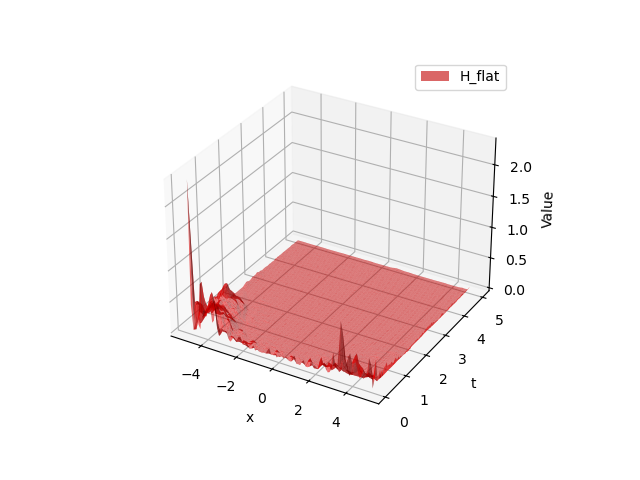

[-0.10055818  0.1286017   0.12111624 -0.09388585 -0.09185322 -0.52440011
  0.26426301]
[0.00407768]
1.5221399456189821


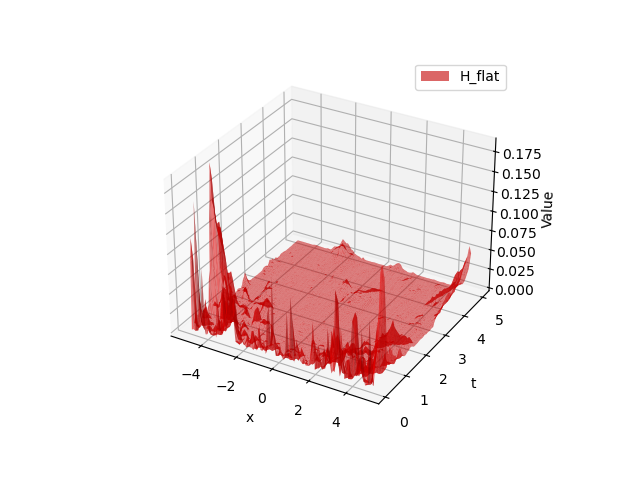

[ 0.04269433 -0.01706975  0.08142871 -0.0471034   0.09312748 -0.31772289
 -0.33687728]
[0.00430196]
0.9958924561508514


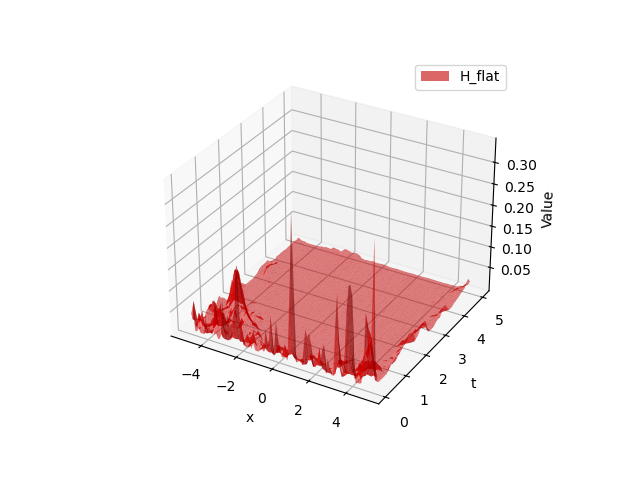

[-0.14308044  0.19702388  0.57979135  0.22488213 -0.10121453  0.35113798
 -0.44046255]
[0.01238162]
5.565416329031154


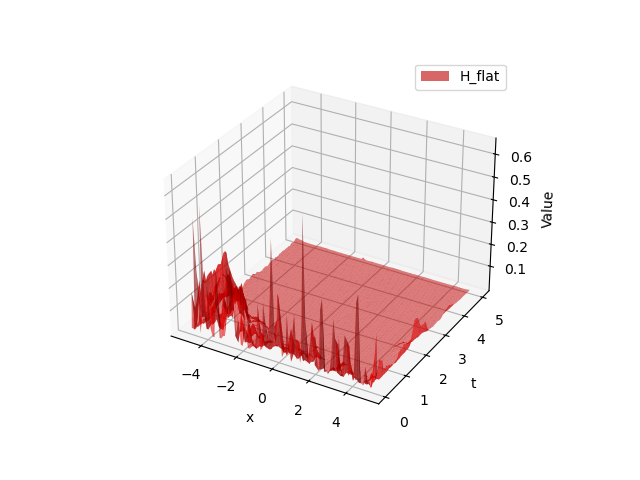

[-0.25198477 -0.1787113   0.71565586  0.28371583  0.24325409  1.58881341
 -1.23115555]
[0.01167018]
0.6530111786038006


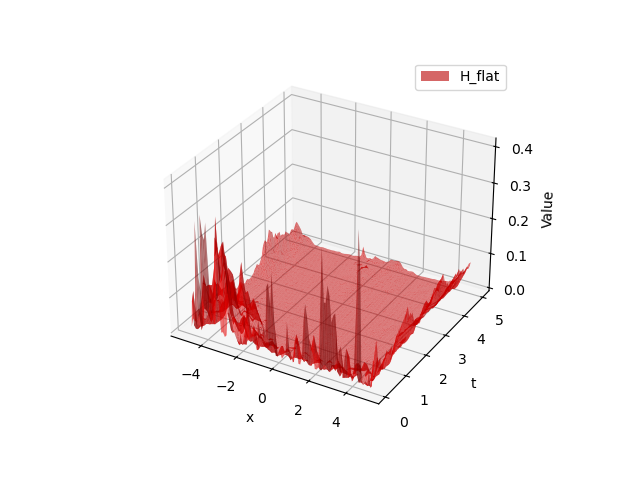

[-0.05322788 -0.00182685 -0.13599333  0.07380607  0.01715263 -0.08555537
  0.39359373]
[0.0031102]
0.6065368620272927


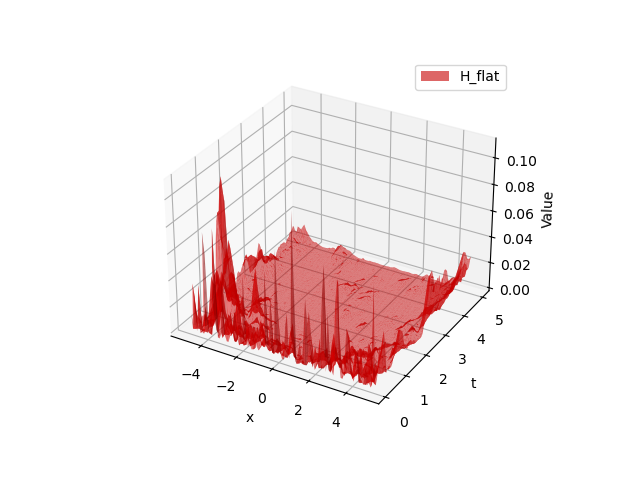

[ 0.12751796 -0.16571484 -0.30212262  0.12775002  0.18047727  0.5378521
 -0.14276761]
[0.00382985]
0.6164506578101586


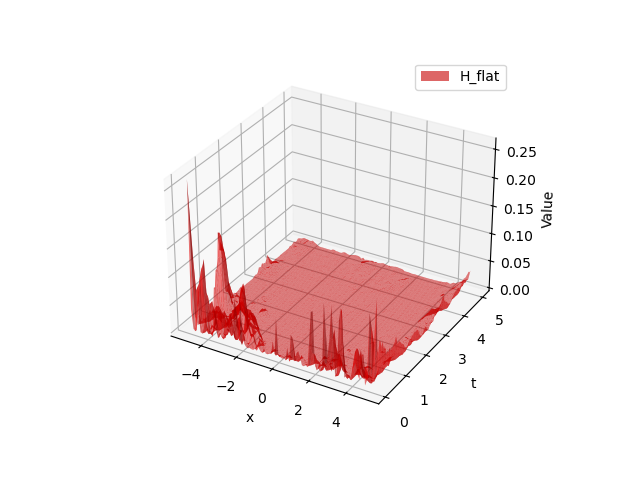

[-0.16237544 -0.0531402   0.39224465  0.041083    0.00390072  0.38269611
 -0.45069079]
[0.00312476]
0.46913726210926276


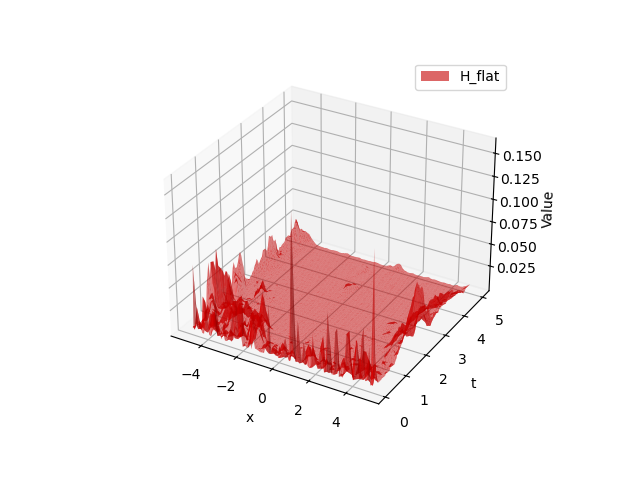

[-0.17487913  0.03427025  0.51731319  0.22905439  0.05919622 -0.86068292
 -0.30209803]
[0.00318484]
1.1992749110002254


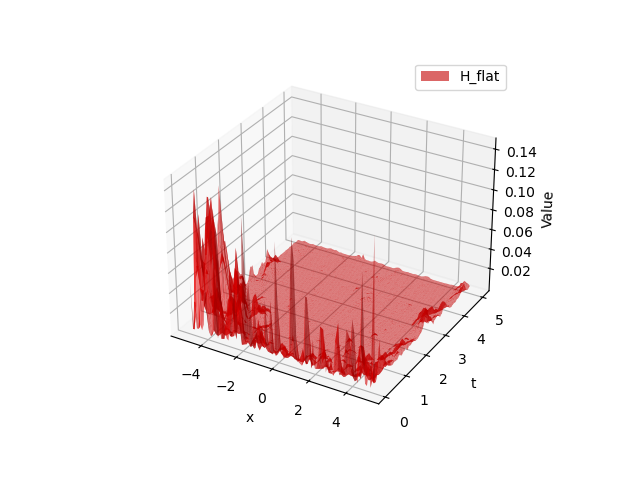

[-0.01285448 -0.56577081 -0.4508042   0.70422934  0.83052882  0.84859937
 -0.22684567]
[0.03113947]
2.670601805404989


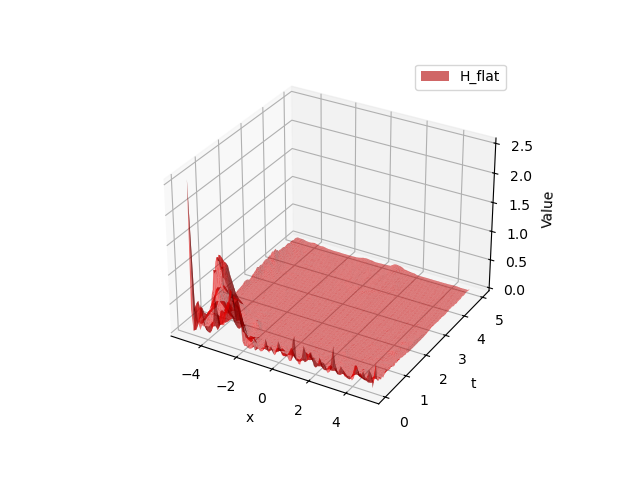

[ 0.05765955  0.2228224   0.05034618 -0.51513637 -0.36319508 -1.48976451
  0.37823368]
[0.00441364]
1.2974468037120026


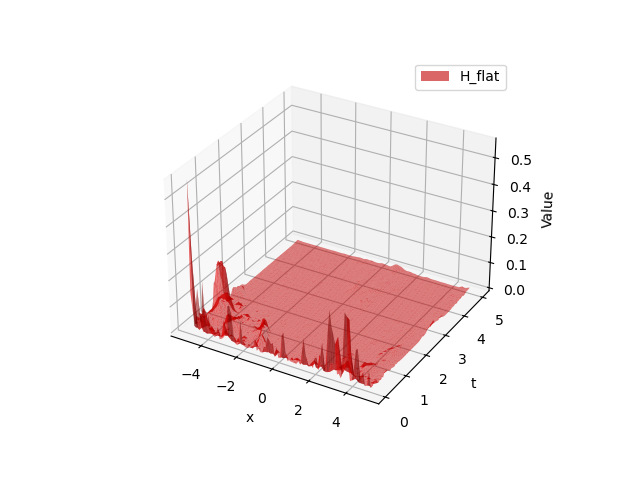

[-0.22476982 -0.10066712  0.49318732 -0.1021939   0.0308341   0.88809725
 -0.72004928]
[0.00530865]
0.5121511458287692


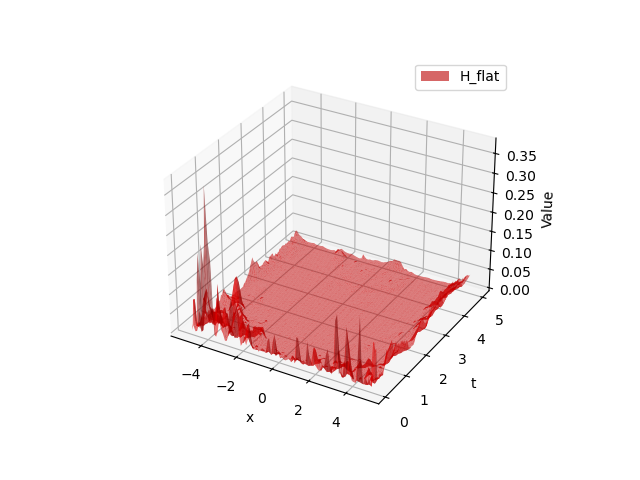

[-0.09475294  0.03932531  0.21112216  0.06744412 -0.00107796  0.02714278
 -0.11250359]
[0.00314191]
11.174941970607327


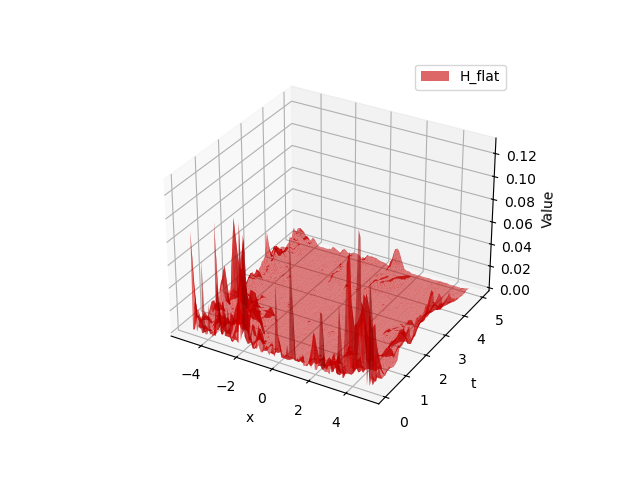

[-0.00839423  0.1660894   0.23939161 -0.38051448 -0.29207298 -0.8075299
 -0.00685866]
[0.00308336]
2.9417126443671258


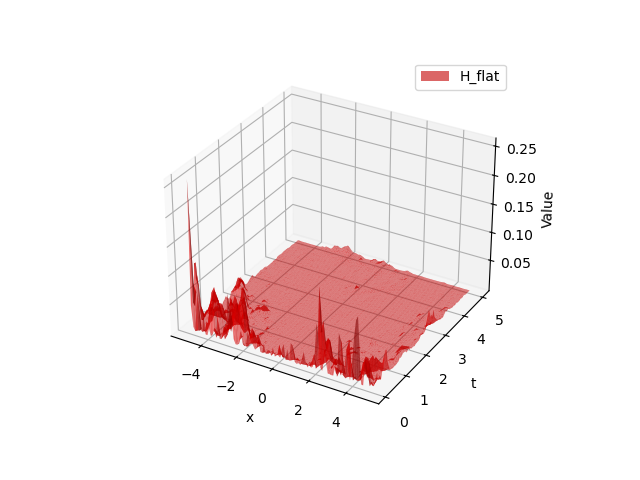

[ 0.15818992 -0.24747405 -0.380472    0.10171931  0.19689573  1.05460925
 -0.05213511]
[0.00830683]
0.5568459330277029


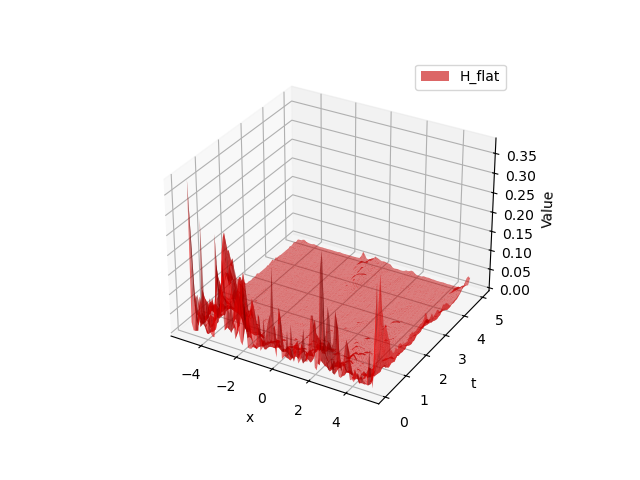

[-0.06100788  0.05309988  0.01712553  0.00226903  0.00440478 -0.75125541
  0.14632627]
[0.00477454]
1.0090644279776653


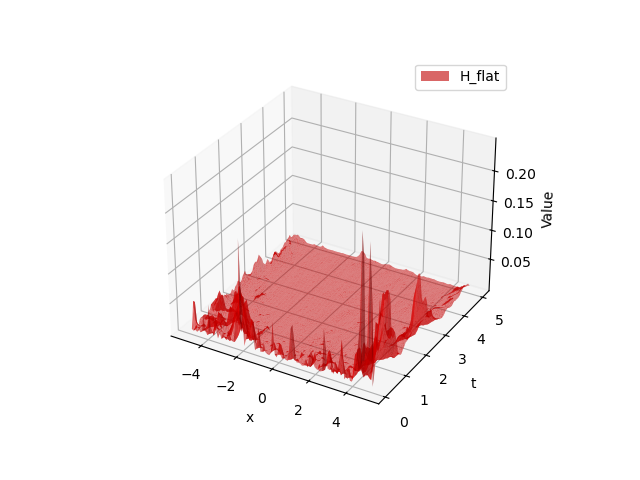

[-0.30552273  0.06255899  0.71423425  0.0572548  -0.05163242 -0.30198892
 -0.30029266]
[0.00423115]
1.4516016330084291


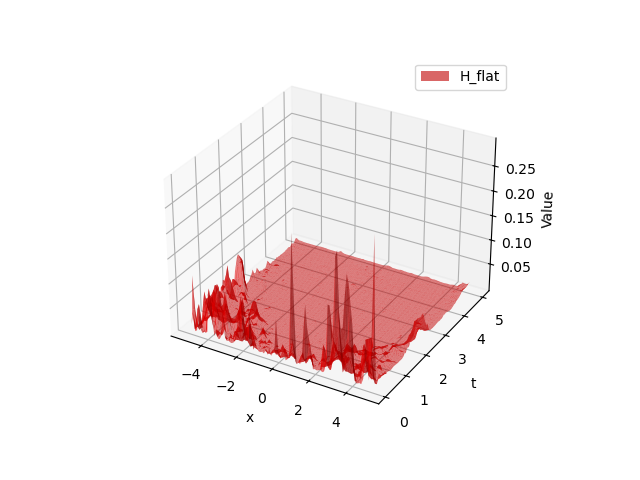

[ 0.00241209 -0.33545334 -0.35890643  0.55355507  0.55988393  0.2632763
  0.08419997]
[0.01110893]
0.5092451356070953


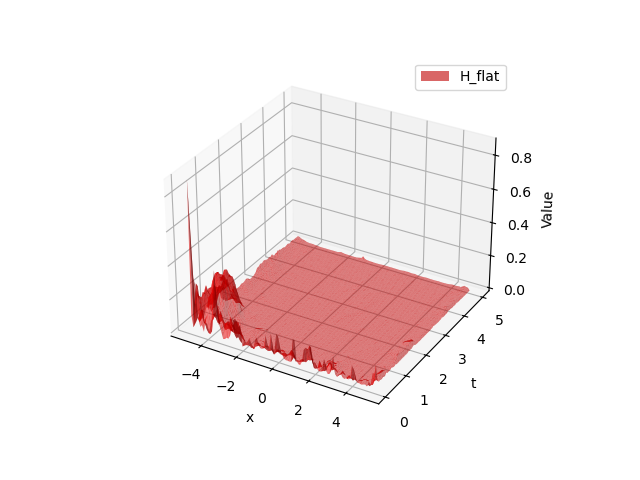

[ 0.19533117  0.15127022 -0.38683299 -0.26674879 -0.14874882 -0.68077149
  0.3963159 ]
[0.0077142]
5.696333823575951


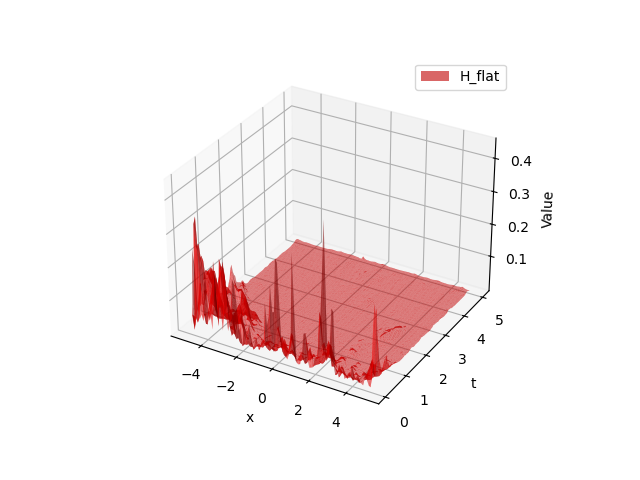

[-0.34555178 -0.03997136  0.9584331  -0.12852646 -0.20397436  2.40103559
 -1.25158651]
[0.01892551]
0.6796023832499871


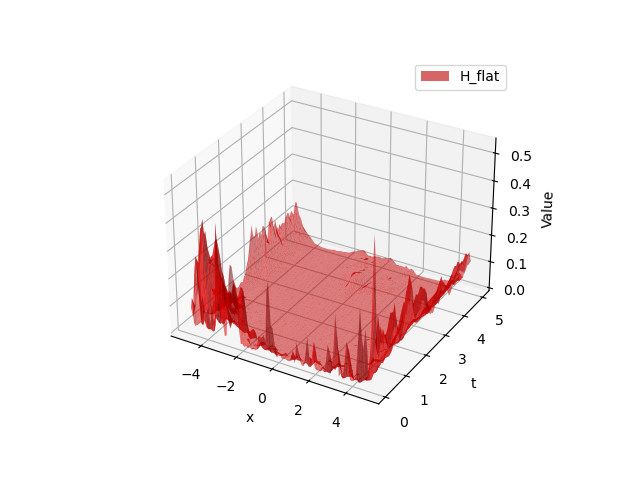

[-0.21174182 -0.2433078   0.42440763  0.23451379  0.26680334  1.04333051
 -0.87146491]
[0.00630877]
0.23023139619891284


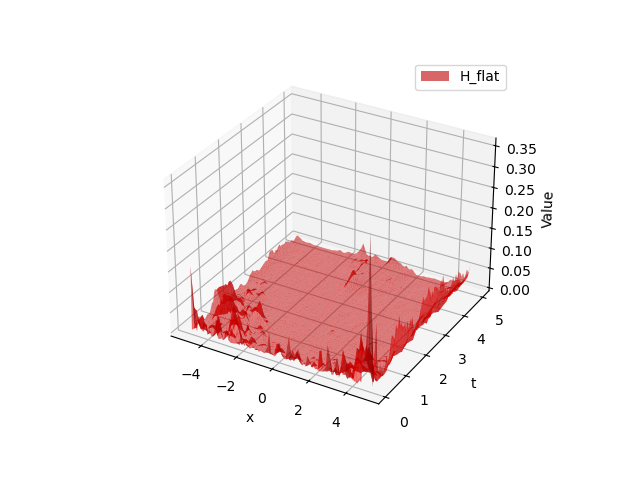

[ 0.05459466 -0.04323552 -0.20015743  0.48283761  0.16522341  0.90210332
  0.11826192]
[0.00671167]
4.776621656424124


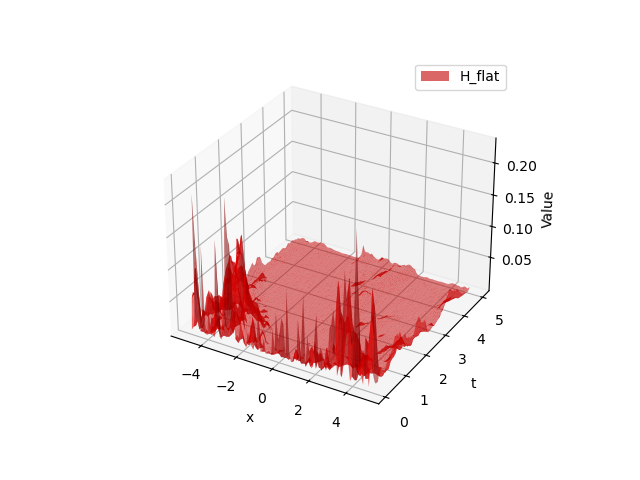

[-0.31967779  0.04022985  1.08941726  0.07854008 -0.15388963  1.53108069
 -1.25175493]
[0.01199404]
0.9555094238678667


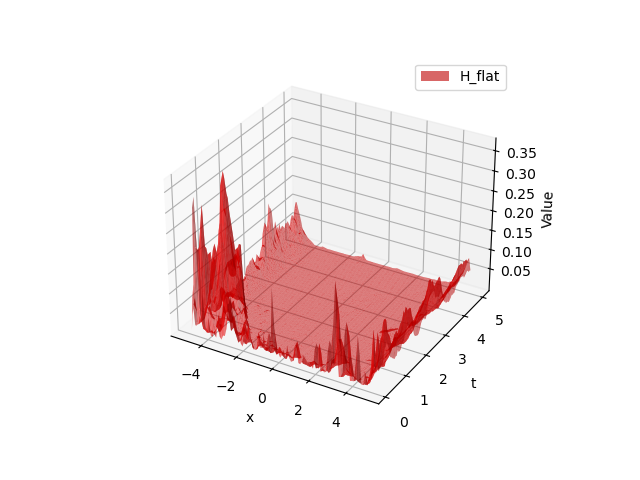

[ 0.1573812  -0.17718675 -0.37454943  0.2414806   0.31644752  0.21251757
 -0.07153549]
[0.00376334]
1.4388980705866967


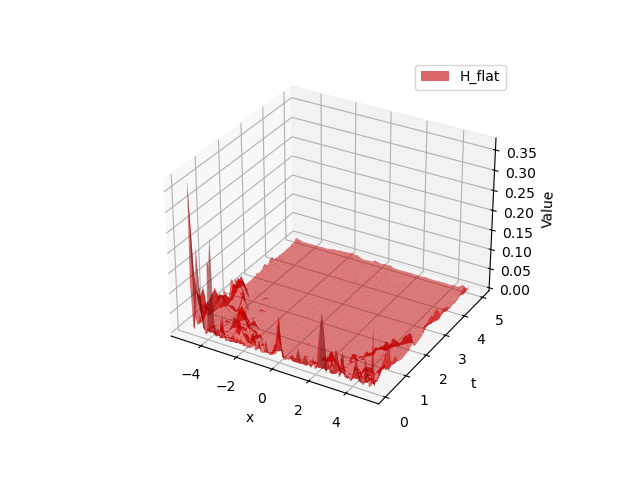

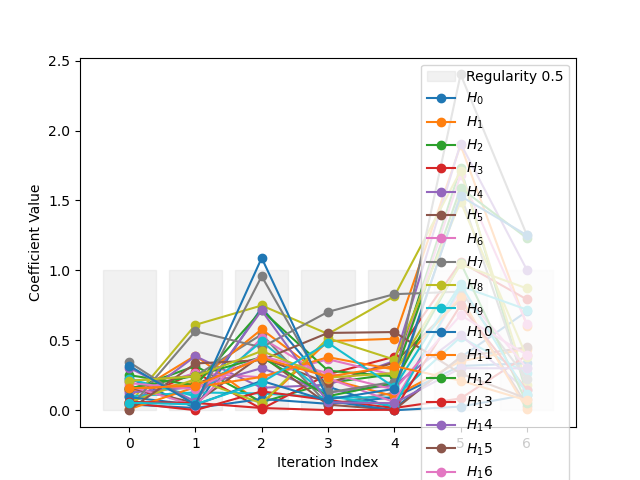

: 

: 

In [ ]:
# Compute the coefficients of the fit
#%matplotlib inline
import numpy as np
coefficients = []
rel_residuals = []
for i in range(len(H[0,0,::])):
    # Flatten the grid and f for vectorized linear algebra
    t_flat = tt[1::,::].ravel()  # shape (10201,)
    x_flat = xx[1::,::].ravel()
    H_flat = H[1::,::,i].ravel()

    # Construct design matrix A where A[:, i] = phi_i(x, y)
    A = np.reshape(basis_elements[1::,::,::],(-1,7))  # shape (10201, n_basis)

    # Solve least squares: A @ c ≈ f_flat
    c, residuals, rank, s = np.linalg.lstsq(A, H_flat, rcond=None)
    print(c)
    print(residuals/t_flat.shape)
    # Now you can reconstruct the fit
    f_fit_flat = A @ c
    f_fit = f_fit_flat.reshape(xx[1::,::].shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    rel_residuals.append(np.mean(abs(f_fit_flat-H_flat)/abs(H_flat+1)))
    #ax.plot_trisurf(x_flat, t_flat, f_fit_flat, color='blue', alpha=0.6, label='f_fit')
    #ax.plot_trisurf(x_flat, t_flat, H_flat, color='red', alpha=0.6, label='H_flat')
    ax.plot_trisurf(x_flat, t_flat, (f_fit_flat-H_flat)**2, color='red', alpha=0.6, label='H_flat')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('Value')
    plt.legend()
    #fig.savefig('Plots/KPZ_D1em1_sine_condition/fit_residual_'+str(i)+'.pdf')
    plt.show()
    coefficients.append(c)


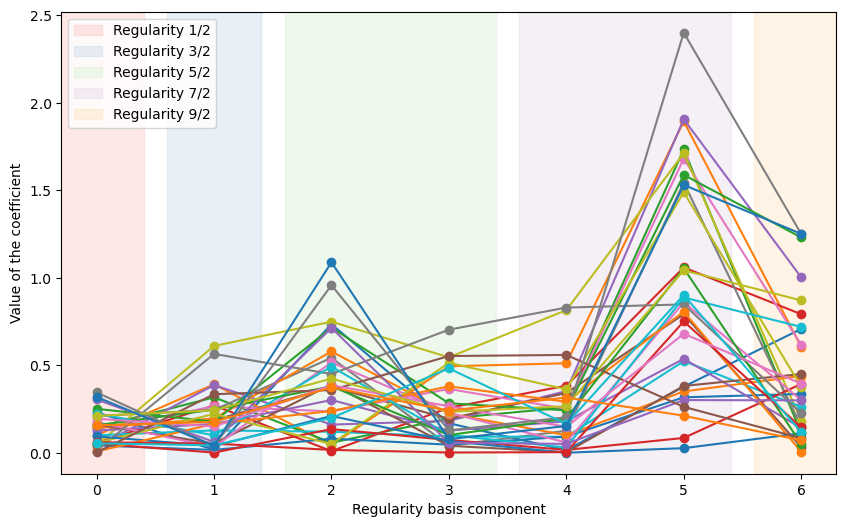

: 

: 

In [ ]:
%matplotlib inline
from collections import defaultdict
from fractions import Fraction

# After the loop, plot all coefficient
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i in range(len(coefficients)):
    ax.plot(range(len(coefficients[0])), abs(coefficients[i]), marker='o')#, label=f'$H_{i}$')

# Draw vertical rectangles for regularity values
# Group indices by regularity value
regularity_values = [1/2, 3/2, 5/2, 5/2, 7/2, 7/2, 9/2]
reg_to_indices = defaultdict(list)
for idx, reg in enumerate(regularity_values):
    reg_to_indices[reg].append(idx)

colors = plt.cm.Pastel1.colors  # Use a colormap for distinct colors
for color_idx, (reg, indices) in enumerate(reg_to_indices.items()):
    # Find the min and max index for this regularity group
    min_idx = min(indices)
    max_idx = max(indices)
    # Draw a rectangle spanning all indices with the same regularity
    reg_frac = Fraction(reg).limit_denominator()
    rect = plt.Rectangle((min_idx-0.4, ax.get_ylim()[0]), 
                         max_idx-min_idx+0.8, 
                         ax.get_ylim()[1]-ax.get_ylim()[0],
                         color=colors[color_idx % len(colors)], 
                         alpha=0.3, 
                         label=f'Regularity {reg_frac}')
    ax.add_patch(rect)


ax.set_ylabel('Value of the coefficient')
ax.set_xlabel('Regularity basis component')


ax.legend()
plt.show()


In [ ]:
plt.plot(np.array(rel_residuals)*100,marker = 'o')
plt.xlabel('Basis element')
plt.ylabel('$\\frac{|H^{NN}-H^{fit}|}{|H^{NN}+1|}$ (%)')
plt.show()

: 

: 